# Checkpoint 2 Notebook

Descriptions of columns in dataset: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data

(5 points) Data preprocessing: (a) import, (b) parse (e.g., convert strings to ints), (c)
organize (e.g., set up a database or a pandas DataFrame).

(20 points) Basic data exploration and summary statistics
○ You must present three conclusions using at least three different statistical
methods including hypothesis testing.
■ For example: What are the main characteristics of your dataset? How
many features and entries are there? Is a feature over-represented? Are
features correlated? Are there outliers? Identify the attributes that will
affect your choice of primary analysis technique. Etcetera.
○ For each method, you must have at least one gorgeous plot.

## Data Preprocessing

Since our dataset is so large, we had to split it into multiple files to be able to upload it to GitHub. Therefore, the first step in our data preprocessing is to import all the files and concatenate them into a single DataFrame. We will use the pandas library for this task.


In [44]:
import pandas as pd


def load_full_crime_data_df():
    year_range = list(range(2020, 2026))
    main_df = None
    for year in year_range:
        df = pd.read_csv(f"data/crime_data_{year}.csv")
        if main_df is None:
            main_df = df
        else:
            main_df = pd.concat([main_df, df], ignore_index=True)
    return main_df


In [45]:
df = load_full_crime_data_df()

In [46]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year
0,211507896,04/11/2021 12:00:00 AM,2020-11-07,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092,2020
1,201516622,10/21/2020 12:00:00 AM,2020-10-18,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203,2020
2,240913563,12/10/2024 12:00:00 AM,2020-10-30,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509,2020
3,210704711,12/24/2020 12:00:00 AM,2020-12-24,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747,2020
4,201418201,10/03/2020 12:00:00 AM,2020-09-29,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,2020


In [47]:
df.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151619
Vict Age                0
Vict Sex           144644
Vict Descent       144656
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677744
Weapon Desc        677744
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935831
Crm Cd 3          1002677
Crm Cd 4          1004927
LOCATION                0
Cross Street       850755
LAT                     0
LON                     0
Year                    0
dtype: int64

We will convert the "Date Rptd" column to datetime format for easier analysis later on.

In [48]:
df["Date Rptd"] = pd.to_datetime(
    df["Date Rptd"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce"
)

Additionally we will combine the "DATE OCC" and "TIME OCC" columns into a single datetime column called "Date Occurred".

In [49]:
df["DATE OCC"] = pd.to_datetime(df["DATE OCC"], errors="coerce")

time_str = df["TIME OCC"].fillna(0).astype(int).astype(str).str.zfill(4)

date_part = df["DATE OCC"].dt.strftime("%Y-%m-%d")
combined = (
    date_part + " " + time_str.str.slice(0, 2) + ":" + time_str.str.slice(2, 4) + ":00"
)
df["DATE OCC"] = pd.to_datetime(combined, format="%Y-%m-%d %H:%M:%S", errors="coerce")
df = df.drop(columns=["TIME OCC"])

In [50]:
for col in df.columns:
    print(
        f"Column '{col}' has {df[col].isnull().sum()} missing values. Column dtype: {df[col].dtype}"
    )

Column 'DR_NO' has 0 missing values. Column dtype: int64
Column 'Date Rptd' has 0 missing values. Column dtype: datetime64[ns]
Column 'DATE OCC' has 0 missing values. Column dtype: datetime64[ns]
Column 'AREA' has 0 missing values. Column dtype: int64
Column 'AREA NAME' has 0 missing values. Column dtype: object
Column 'Rpt Dist No' has 0 missing values. Column dtype: int64
Column 'Part 1-2' has 0 missing values. Column dtype: int64
Column 'Crm Cd' has 0 missing values. Column dtype: int64
Column 'Crm Cd Desc' has 0 missing values. Column dtype: object
Column 'Mocodes' has 151619 missing values. Column dtype: object
Column 'Vict Age' has 0 missing values. Column dtype: int64
Column 'Vict Sex' has 144644 missing values. Column dtype: object
Column 'Vict Descent' has 144656 missing values. Column dtype: object
Column 'Premis Cd' has 16 missing values. Column dtype: float64
Column 'Premis Desc' has 588 missing values. Column dtype: object
Column 'Weapon Used Cd' has 677744 missing values.

Mocodes stands for Modus Operandi Codes, which are codes used to describe the method or manner in which a crime was committed. We will fill any missing values in this column with "Unknown".

In [51]:
df["Mocodes"] = df["Mocodes"].fillna("Unknown")

For the "Vict Sex" and "Vict Descent" columns, we have filled any missing values with "X" to indicate that the information is not available, which is the convention used in the dataset.

In [52]:
df["Vict Sex"] = df["Vict Sex"].fillna("X")
df["Vict Descent"] = df["Vict Descent"].fillna("X")

In [53]:
df["Premis Cd"] = df["Premis Cd"].fillna(-1.0)
df["Premis Desc"] = df["Premis Desc"].fillna("Unknown")

In [54]:
df["Weapon Used Cd"] = df["Weapon Used Cd"].fillna(-1.0)
df["Weapon Desc"] = df["Weapon Desc"].fillna("Unkown")

In [55]:
df["Status"] = df["Status"].fillna("Unknown")

In [56]:
df["Crm Cd 1"] = df["Crm Cd 1"].fillna(-1.0)
df["Crm Cd 2"] = df["Crm Cd 2"].fillna(-1.0)
df["Crm Cd 3"] = df["Crm Cd 3"].fillna(-1.0)
df["Crm Cd 4"] = df["Crm Cd 4"].fillna(-1.0)

In [57]:
df["Cross Street"] = df["Cross Street"].fillna("N/A")

## Basic Data Exploration and Summary Statistics

We have a lot of information regarding the location of the crimes, including the "AREA" column which indicates the geographical area where the crime occurred. We will analyze the distribution of crimes across different areas to see if certain areas have a higher incidence of crime.

Our null hypothesis (H0) is that crimes are uniformly distributed across all areas, while our alternative hypothesis (Ha) is that crimes are not uniformly distributed across all areas.

Explicitly:

H0: Crime counts are the same across AREA categories (observed distribution is a  uniform distribution).

Ha: Crime counts differ for at least one AREA (distribution is not uniform).

We will use the Chi-Squared test to evaluate our hypotheses. This test is appropriate because we are comparing the observed frequencies of crimes in each area to the expected frequencies under the null hypothesis of uniform distribution.

We will use a significance level of α = 0.05 to determine whether to reject or fail to reject the null hypothesis.

In [58]:
from scipy.stats import chisquare

counts = df["AREA"].value_counts().sort_index().values
# expected uniform
expected = [counts.sum() / len(counts)] * len(counts)
statistic, p_value = chisquare(counts, f_exp=expected)

print(f"Chi-square statistic: {statistic}, p-value: {p_value}")

Chi-square statistic: 32102.962295184738, p-value: 0.0


Our p-value from the Chi-Squared test is extremely small (so small that it was rounded down to 0.0), which is less than our significance level of 0.05. Therefore, we reject the null hypothesis and conclude that crimes are not uniformly distributed across areas.

We'll first plot the distribution of crimes across different areas using a bar plot.

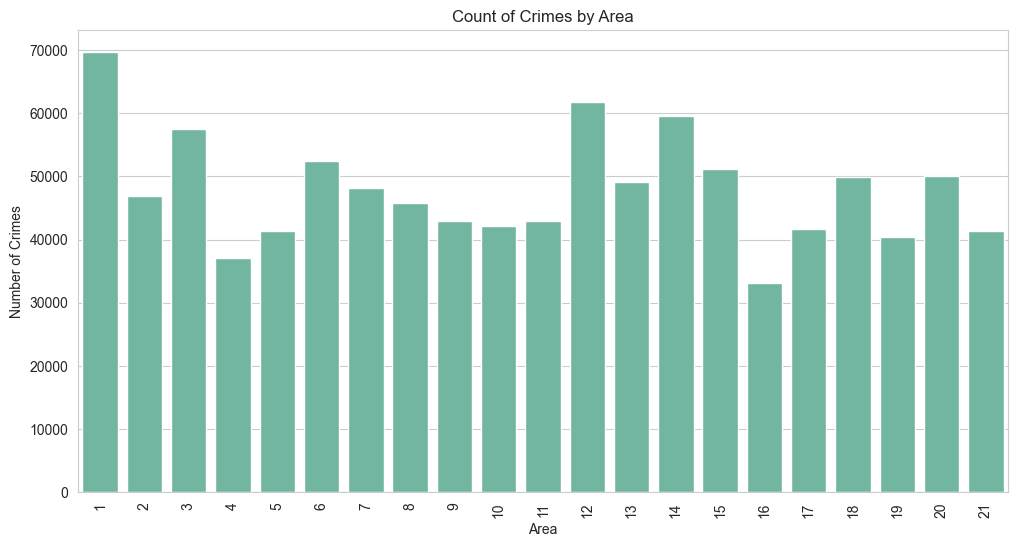

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Set2")
sns.set_style("whitegrid")

area_counts = df["AREA"].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=area_counts.index, y=area_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Area")
plt.ylabel("Number of Crimes")
plt.title("Count of Crimes by Area")
plt.show()


Another thing we can check is if crime frequency changes by period of the week (weekend vs weekday). First, we will create a new column "Day Type" that categorizes each day as either "Weekend" or "Weekday" based on the "Date Occurred" column.

In [ ]:
df["is_weekend"] = df["DATE OCC"].dt.dayofweek.apply(lambda x: x >= 5)


0           True
1           True
2          False
3          False
4          False
           ...  
1004986     True
1004987    False
1004988    False
1004989    False
1004990    False
Name: is_weekend, Length: 1004991, dtype: bool

Here, our null hypothesis (H0) is that the mean number of daily crimes on weekends is equal to the mean number of daily crimes on weekdays. Our alternative hypothesis (Ha) is that the mean number of daily crimes on weekends is greater than the mean number of daily crimes on weekdays.

We will use a two-sample t-test to evaluate our hypotheses. This test is appropriate because we are comparing the means of two independent groups (weekend days and weekday days).

In [ ]:
from scipy.stats import ttest_ind

In [83]:
# build daily incident counts using existing is_weekend column
daily = (
    df[df["DATE OCC"].notna()]
    .assign(
        date=df["DATE OCC"].dt.date,
        weekday=df["DATE OCC"].dt.day_name(),
        is_weekend=df["is_weekend"],
    )
    .groupby(["date", "weekday", "is_weekend"], as_index=False)
    .size()
    .rename(columns={"size": "count"})
)

# label day_type from the boolean is_weekend
daily["day_type"] = daily["is_weekend"].map({True: "Weekend", False: "Weekday"})

# separate groups (incidents-per-day)
weekend_counts = daily.loc[daily["is_weekend"], "count"].values
weekday_counts = daily.loc[~daily["is_weekend"], "count"].values


# two-sample t-test (Welch if unequal variances)
t_stat, p_two = ttest_ind(
    weekend_counts,
    weekday_counts,
)
# convert to one-sided p for HA: weekend > weekday
p_one = (p_two / 2.0) if t_stat > 0 else (1.0 - p_two / 2.0)

In [ ]:
print(f"n_weekend_days={len(weekend_counts)}, mean_weekend={weekend_counts.mean():.3f}")
print(f"n_weekday_days={len(weekday_counts)}, mean_weekday={weekday_counts.mean():.3f}")
print(
    f"t-stat={t_stat:.4g}, two-sided p={p_two:.4g}, one-sided p (weekend>weekday)={p_one:.4g}"
)


n_weekend_days=531, mean_weekend=540.691
n_weekday_days=1348, mean_weekday=532.555
t-stat=0.9357, two-sided p=0.3495, one-sided p (weekend>weekday)=0.1748


Since our p-value from the two sided t-test (0.1748) is greater than our significance level of 0.05, we fail to reject the null hypothesis. Therefore, we do not have sufficient evidence to conclude that the mean number of daily crimes on weekends is greater than the mean number of daily crimes on weekdays.

To visualize the difference in daily crime counts between weekends and weekdays, we will create a box plot.

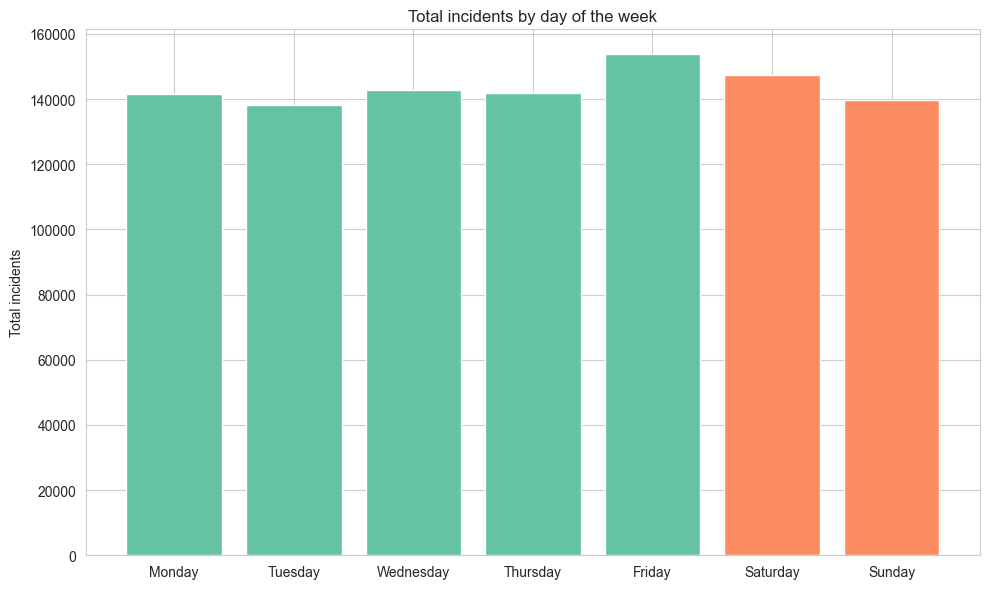

In [102]:
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
counts_by_weekday = (
    df[df["DATE OCC"].notna()]["DATE OCC"]
    .dt.day_name()
    .value_counts()
    .reindex(day_order)
    .astype(int)
)

plt.figure(figsize=(10, 6))
colors = ["C1" if d in ["Saturday", "Sunday"] else "C0" for d in day_order]
bars = plt.bar(day_order, counts_by_weekday.values, color=colors)
plt.ylabel("Total incidents")
plt.title("Total incidents by day of the week")
plt.tight_layout()
plt.show()

This plot shows the distribution of daily crime counts for weekends and weekdays. It visually reinforces our statistical finding that there is no significant difference in the mean number of daily crimes between weekends and weekdays.